In [2]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.

In [4]:
pip install transformers -U

In [5]:
pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 2.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [18]:
from transformers import pipeline, AutoTokenizer, DataCollatorWithPadding, AutoModelForSequenceClassification, TrainingArguments, Trainer, pipeline
from datasets import load_dataset, load_metric
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#sampling the dataset
ds = load_dataset('yelp_review_full')

trained = ds['train']
tested = ds['test']

#sampling the dataset
sample_train_dataset = ds["train"].shuffle(seed=42).select([i for i in list(range(300))])
sample_test_dataset = ds["test"].shuffle(seed=42).select([i for i in list(range(300))])

In [20]:
#preprocessing the dataset
def convert_label(x):
  if x == 1 or x == 2:
    return 0
  else:
    return 1

sample_train_dataset = sample_train_dataset.map(lambda x: {'label': convert_label(x['label'])})
sample_test_dataset = sample_test_dataset.map(lambda x: {'label': convert_label(x['label'])})

#1. we will use distilbert tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

#2. prepare both splits
def preprocess_function(text):

  tokenized = tokenizer(text["text"], truncation=True)
  return tokenized

tokenized_train = sample_train_dataset.map(preprocess_function, batched=True)
tokenized_test = sample_test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

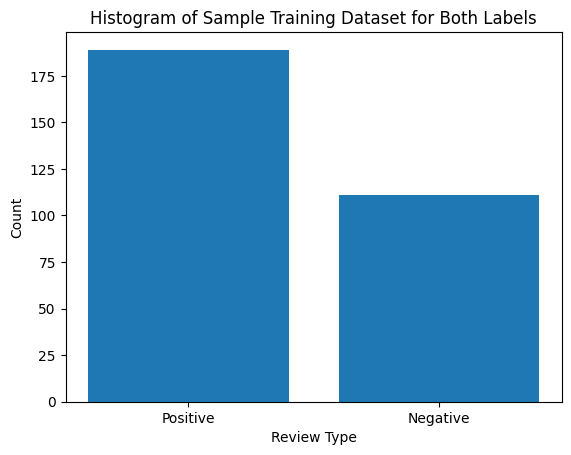

In [21]:
#Visualization  of negative and positive reviews

# labels to strings for plotting
labels = [str(label) for label in sample_train_dataset['label']]

#positive and negative reviews count
positive_count = labels.count('1')
negative_count = labels.count('0')

#histogram
plt.bar(['Positive', 'Negative'], [positive_count, negative_count])
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.title('Histogram of Sample Training Dataset for Both Labels')
plt.show()
